In [44]:
# Import Dependencies
from sklearn import datasets
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

## HR Employee Attrition
Keywords: multivariate, classification.

## Description
This dataset is used to evaluae what features lead to employee attrition. This is a fictional data set that was created by IBM data scientists to reflect real world data.

## Source
https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

In [18]:
# Read the csv file into a pandas DataFrame
hre_data = pd.read_csv('../Resources/HREmployeeAttrition.csv')
hre_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [28]:
# Select our independent X variables, and our dependent y variable. 
X = hre_data.drop(columns = ['Attrition'])
y = hre_data['Attrition']

In [29]:
# Confirm imblance of target variable 'Attrition'
# 1 = Attrition; 0 = No Attrition
print("Total Counts:")
print(y.value_counts())
print("")
print("Percentage:")
print(y.value_counts(normalize=True))


Total Counts:
0    1233
1     237
Name: Attrition, dtype: int64

Percentage:
0    0.838776
1    0.161224
Name: Attrition, dtype: float64


### Imbalanced

In [57]:
# Create Validation training and testing datasets without balancing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1) 


In [58]:
# Confirm imblance of target variable 'Attrition' in the test dataset
# 1 = Attrition; 0 = No Attrition
print("Total Counts:")
print(y.value_counts())
print("")
print("Percentage:")
print(y.value_counts(normalize=True))


Total Counts:
0    1233
1     237
Name: Attrition, dtype: int64

Percentage:
0    0.838776
1    0.161224
Name: Attrition, dtype: float64


In [59]:
# Create a Linear Regression model object
model = LogisticRegression(solver='liblinear')

In [60]:
# Train the model using the training datasets
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [61]:
# Make predictions using the testing dataset
y_pred = model.predict(X_test)

Accuracy: 0.8333333333333334
True Negative: 230
False Positive: 6
False Negative: 43
True Positive: 15


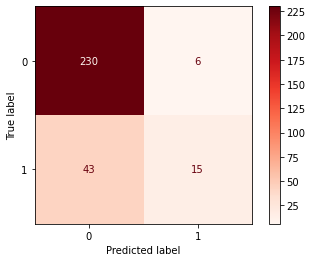

In [62]:
# Plot the Confusion Matrix values
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Reds)
print(f'Accuracy: {model.score(X_test, y_test)}')

# Create DataFrame of results
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(f"True Negative: {tn}")
print(f"False Positive: {fp}")
print(f"False Negative: {fn}")
print(f"True Positive: {tp}")


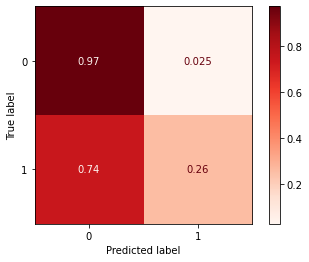

In [63]:
# Plot the Confusion Matrix prediction percentages
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Reds, normalize='true')

In [66]:
# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90       236
           1       0.71      0.26      0.38        58

    accuracy                           0.83       294
   macro avg       0.78      0.62      0.64       294
weighted avg       0.82      0.83      0.80       294



### Balanced

In [49]:
# Create our Validation training and testing datasets with balancing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify=y)

In [50]:
# Confirm imblance of target variable 'Attrition' in our stratified dataset
# 1 = Attrition; 0 = No Attrition
print("Total Counts:")
print(y.value_counts())
print("")
print("Percentage:")
print(y.value_counts(normalize=True))

Total Counts:
0    1233
1     237
Name: Attrition, dtype: int64

Percentage:
0    0.838776
1    0.161224
Name: Attrition, dtype: float64


In [51]:
# Create the Linear Regression model object
model = LogisticRegression(solver='liblinear')

In [52]:
# Train the model using the training sets
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [53]:
# Make predictions using the testing dataset
y_pred = model.predict(X_test)

Accuracy: 0.8571428571428571
True Negative: 236
False Positive: 11
False Negative: 31
True Positive: 16


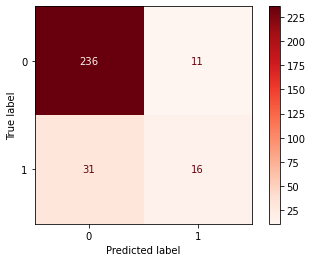

In [54]:
# Plot the Confusion Matrix values
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Reds)
print(f'Accuracy: {model.score(X_test, y_test)}')

# Create DataFrame of results

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(f"True Negative: {tn}")
print(f"False Positive: {fp}")
print(f"False Negative: {fn}")
print(f"True Positive: {tp}")


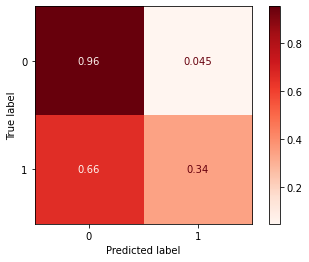

In [55]:
# Plot the Confusion Matrix prediction percentages
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Reds, normalize='true')

In [65]:
# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.84      0.97      0.90       236
           1       0.71      0.26      0.38        58

    accuracy                           0.83       294
   macro avg       0.78      0.62      0.64       294
weighted avg       0.82      0.83      0.80       294

